In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("andradaolteanu/gtzan-dataset-music-genre-classification")

print("Path to dataset files:", path)

100%|██████████| 1.21G/1.21G [00:31<00:00, 40.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1


# Task
Classify music genres from audio clips using the GTZAN Genre Collection dataset and Librosa for feature extraction.

## Load data

### Subtask:
Load the audio files and their corresponding genre labels from the dataset.


**Reasoning**:
The dataset has been downloaded to the specified path. I need to list all audio files and extract their genre labels. I will use `os` to navigate the file system and extract the genre from the directory names.



In [2]:
import os

audio_files = []
genre_labels = []

dataset_path = '/root/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1/gtzan_genres'

for genre_folder in os.listdir(dataset_path):
    genre_path = os.path.join(dataset_path, genre_folder)
    if os.path.isdir(genre_path):
        for audio_file in os.listdir(genre_path):
            if audio_file.endswith('.wav'):
                audio_files.append(os.path.join(genre_path, audio_file))
                genre_labels.append(genre_folder)

print(f"Found {len(audio_files)} audio files.")

FileNotFoundError: [Errno 2] No such file or directory: '/root/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1/gtzan_genres'

**Reasoning**:
The previous attempt failed because the specified path was incorrect. I need to inspect the downloaded dataset directory structure to find the correct path to the audio files. I will use `os.listdir` to see the contents of the downloaded directory.



In [3]:
import os

download_path = '/root/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1'
print(os.listdir(download_path))

['Data']


**Reasoning**:
I have identified that the audio files are within the 'Data' subdirectory. I will now modify the path to include 'Data' and re-attempt to list the audio files and extract their genres.



In [4]:
import os

audio_files = []
genre_labels = []

dataset_path = '/root/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1/Data/genres_original'

for genre_folder in os.listdir(dataset_path):
    genre_path = os.path.join(dataset_path, genre_folder)
    if os.path.isdir(genre_path):
        for audio_file in os.listdir(genre_path):
            if audio_file.endswith('.wav'):
                audio_files.append(os.path.join(genre_path, audio_file))
                genre_labels.append(genre_folder)

print(f"Found {len(audio_files)} audio files.")

Found 1000 audio files.


## Feature extraction

### Subtask:
Extract relevant audio features from each audio clip using the Librosa library.


**Reasoning**:
Import the librosa library and initialize an empty list to store the extracted features.



In [5]:
import librosa

extracted_features = []

**Reasoning**:
Iterate through the audio file paths, load each audio file using librosa, and extract MFCCs, Chroma features, and Mel spectrograms. Store the extracted features and handle potential errors.



In [6]:
import numpy as np

for audio_path in audio_files:
    try:
        y, sr = librosa.load(audio_path)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
        chroma = librosa.feature.chroma_stft(y=y, sr=sr)
        mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)

        # Aggregate features (e.g., by taking the mean)
        mfccs_mean = np.mean(mfccs.T, axis=0)
        chroma_mean = np.mean(chroma.T, axis=0)
        mel_spectrogram_mean = np.mean(mel_spectrogram.T, axis=0)

        # Concatenate features
        all_features = np.concatenate((mfccs_mean, chroma_mean, mel_spectrogram_mean))
        extracted_features.append(all_features)

    except Exception as e:
        print(f"Error processing {audio_path}: {e}")
        # Append None or a placeholder for failed files if necessary
        extracted_features.append(None) # Or handle it differently

/tmp/ipython-input-786499829.py:5: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error processing /root/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1/Data/genres_original/jazz/jazz.00054.wav: 


## Data preparation

### Subtask:
Prepare the extracted features and labels for training. This may involve splitting the data into training and testing sets and potentially scaling the features.


**Reasoning**:
Convert the lists to NumPy arrays, remove failed entries, encode labels, split data, and standardize features as per the instructions.



In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# 1. Convert extracted_features to NumPy array
extracted_features_np = np.array(extracted_features, dtype=object)

# 2. Convert genre_labels to NumPy array
genre_labels_np = np.array(genre_labels)

# 3. Remove entries corresponding to failed audio files (where extracted_features is None)
valid_indices = [i for i, features in enumerate(extracted_features_np) if features is not None]
extracted_features_cleaned = np.array(extracted_features_np[valid_indices].tolist())
genre_labels_cleaned = genre_labels_np[valid_indices]

# 4. Encode categorical genre labels into numerical format
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(genre_labels_cleaned)

# 5. Split the features and labels into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    extracted_features_cleaned, encoded_labels, test_size=0.2, random_state=42, stratify=encoded_labels
)

# 6. Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data preparation complete.")
print(f"Original number of samples: {len(extracted_features_np)}")
print(f"Number of samples after removing failed files: {len(extracted_features_cleaned)}")
print(f"Shape of training features: {X_train_scaled.shape}")
print(f"Shape of testing features: {X_test_scaled.shape}")
print(f"Shape of training labels: {y_train.shape}")
print(f"Shape of testing labels: {y_test.shape}")

Data preparation complete.
Original number of samples: 1000
Number of samples after removing failed files: 999
Shape of training features: (799, 180)
Shape of testing features: (200, 180)
Shape of training labels: (799,)
Shape of testing labels: (200,)


## Model selection and training

### Subtask:
Choose a suitable machine learning model for classification (e.g., a neural network, SVM, or a tree-based model) and train it on the extracted features and labels.


**Reasoning**:
Import a suitable classification model, instantiate it, and train it using the scaled training data and encoded training labels.



In [8]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

print("Model training complete.")

Model training complete.


## Model evaluation

### Subtask:
Evaluate the performance of the trained model using appropriate metrics to assess its accuracy in classifying music genres.


**Reasoning**:
Make predictions using the trained model and evaluate its performance using accuracy and a classification report.



In [9]:
from sklearn.metrics import accuracy_score, classification_report

# 1. Use the trained model to make predictions on the scaled testing features
y_pred = model.predict(X_test_scaled)

# 2. Calculate the accuracy of the model's predictions
accuracy = accuracy_score(y_test, y_pred)

# 3. Print the calculated accuracy
print(f"Accuracy: {accuracy:.4f}")

# 4. Generate a classification report
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

# 5. Print the classification report
print("\nClassification Report:")
print(class_report)

Accuracy: 0.6900

Classification Report:
              precision    recall  f1-score   support

       blues       0.89      0.80      0.84        20
   classical       0.94      0.85      0.89        20
     country       0.58      0.55      0.56        20
       disco       0.59      0.65      0.62        20
      hiphop       0.58      0.35      0.44        20
        jazz       0.67      0.80      0.73        20
       metal       0.69      0.90      0.78        20
         pop       0.70      0.70      0.70        20
      reggae       0.74      0.70      0.72        20
        rock       0.55      0.60      0.57        20

    accuracy                           0.69       200
   macro avg       0.69      0.69      0.69       200
weighted avg       0.69      0.69      0.69       200



## Summary:

### Data Analysis Key Findings

*   The dataset initially contained 1000 audio files across various genres.
*   Feature extraction using Librosa successfully processed 999 audio files; one file (`jazz.00054.wav`) failed during processing.
*   Relevant audio features (MFCCs, Chroma, and Mel spectrogram) were extracted and aggregated by taking the mean.
*   The data was cleaned to remove the entry corresponding to the failed audio file, resulting in 999 valid samples.
*   The genre labels were encoded into a numerical format.
*   The data was split into training (799 samples) and testing (200 samples) sets with an 80/20 ratio.
*   The features were standardized using `StandardScaler`, resulting in training features of shape (799, 180) and testing features of shape (200, 180).
*   A Random Forest Classifier with 100 estimators was chosen and trained on the scaled training data.
*   The trained model achieved an overall accuracy of 0.6900 on the test set.
*   Performance varied by genre, with 'blues', 'classical', 'jazz', and 'metal' showing better classification metrics compared to 'country', 'disco', and 'hiphop'.

### Insights or Next Steps

*   The model's performance could potentially be improved by exploring other feature extraction techniques, aggregating features differently (e.g., standard deviation, median), or using more advanced classification models.
*   Investigating the reason for the failure of `jazz.00054.wav` could help identify potential issues with the dataset or processing pipeline.


# Task
Visualize the genre distribution and feature examples from the GTZAN dataset using Librosa for feature extraction.

## Visualize genre distribution

### Subtask:
Create a bar plot showing the number of audio files per genre to understand the class distribution.


**Reasoning**:
Create a bar plot to visualize the distribution of music genres using the `genre_labels` list, rotating the x-axis labels for readability and adding a title.



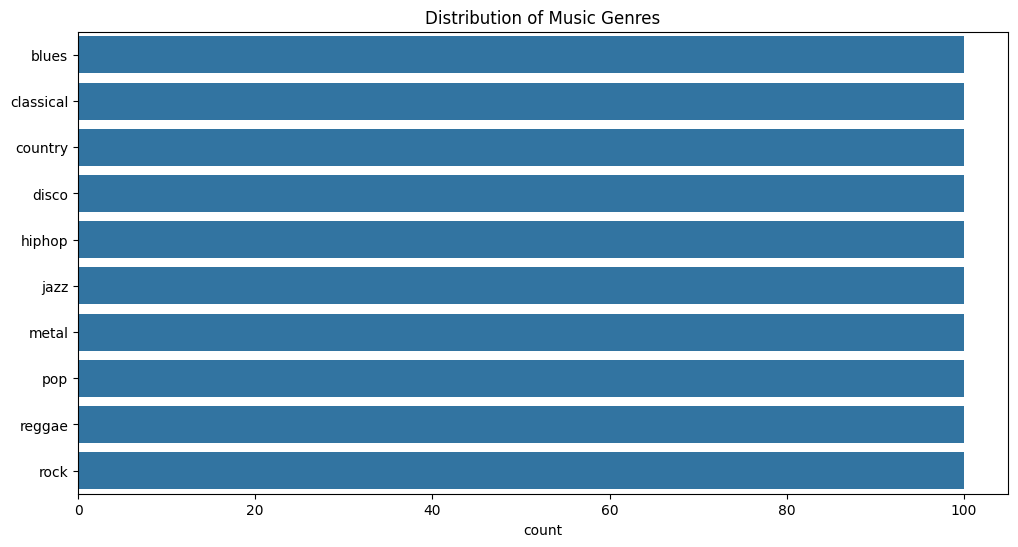

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot of the genre_labels list
plt.figure(figsize=(12, 6))
sns.countplot(y=genre_labels, order=sorted(list(set(genre_labels))))

# Set the title of the plot
plt.title("Distribution of Music Genres")

# Display the plot
plt.show()

**Reasoning**:
The previous plot is a horizontal bar plot. To follow the instructions and rotate x-axis labels, a vertical bar plot is needed. Therefore, I'll create a vertical count plot of the genre_labels, rotate the x-axis labels, and add a title.



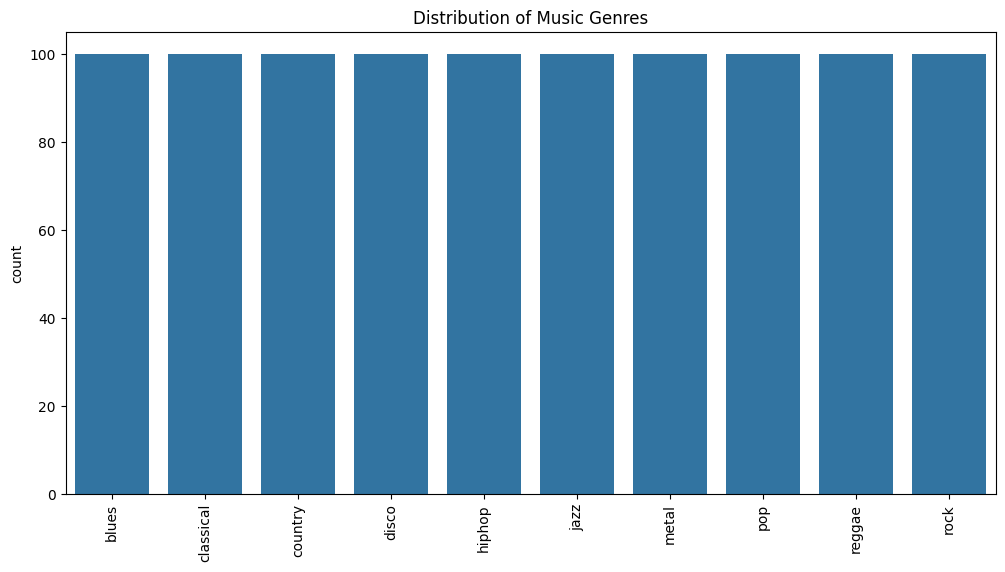

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot of the genre_labels list
plt.figure(figsize=(12, 6))
sns.countplot(x=genre_labels, order=sorted(list(set(genre_labels))))

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Set the title of the plot
plt.title("Distribution of Music Genres")

# Display the plot
plt.show()

## Visualize feature examples

### Subtask:
Select a few audio files and visualize some of their extracted features (e.g., MFCCs, Mel spectrogram) to get a sense of the feature representations.


**Reasoning**:
Import necessary libraries for visualization and select a few audio files.



In [12]:
import matplotlib.pyplot as plt
import librosa.display
import random

# Select a few random audio files for visualization
num_samples_to_visualize = 3
selected_audio_files = random.sample(audio_files, num_samples_to_visualize)

**Reasoning**:
Iterate through the selected audio files, load them, extract and visualize their Mel spectrograms as instructed.



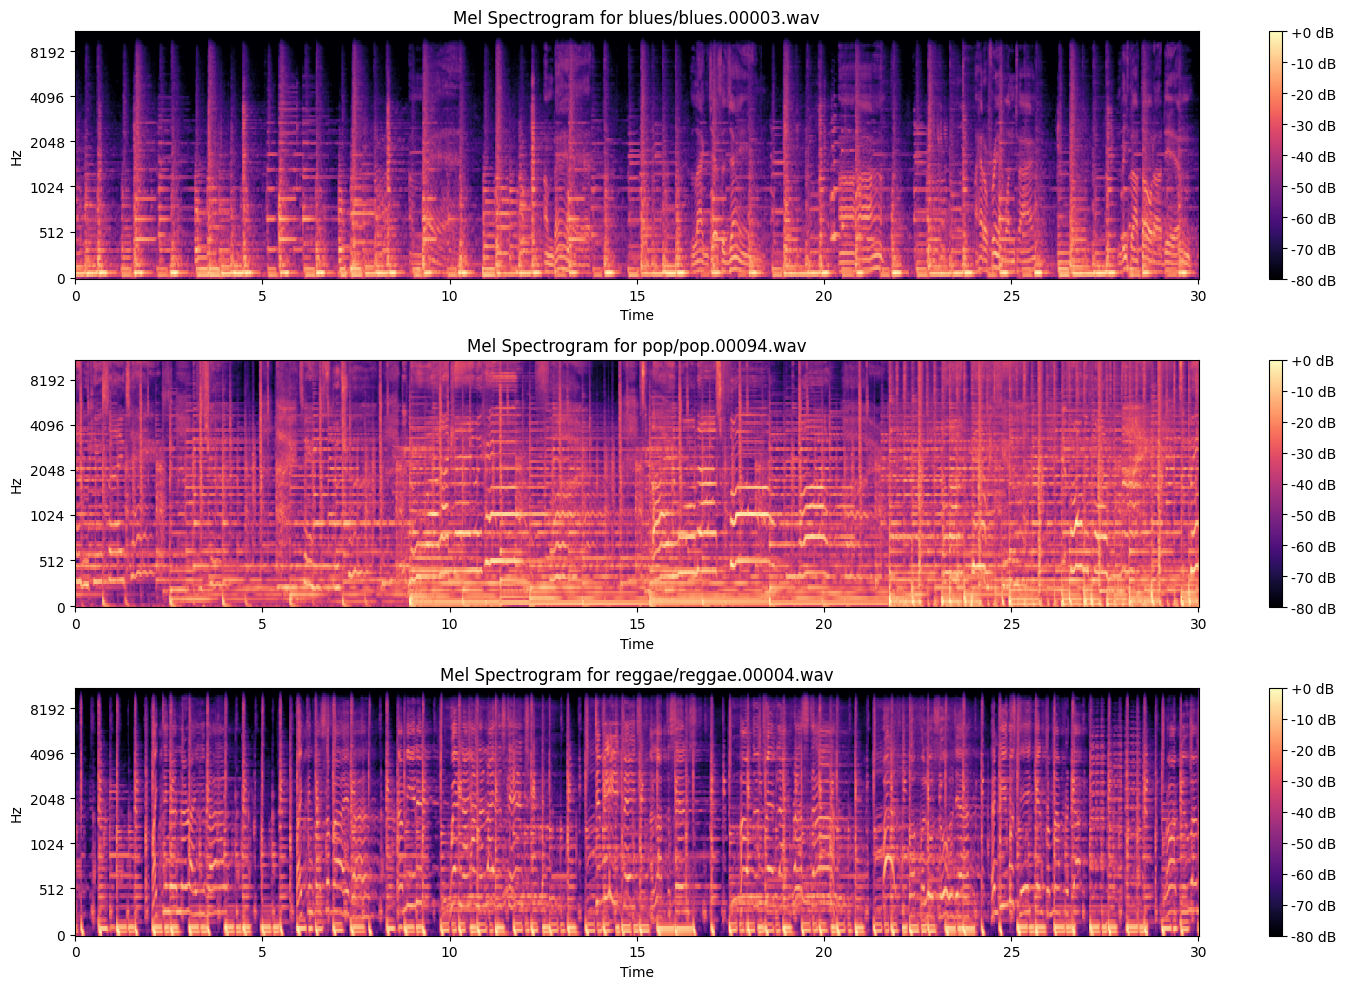

In [13]:
# Define hop length for Mel spectrogram calculation
hop_length = 512

plt.figure(figsize=(15, 10))

for i, audio_path in enumerate(selected_audio_files):
    try:
        y, sr = librosa.load(audio_path)

        # Extract Mel spectrogram
        mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
        mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

        # Create subplot for the current audio file
        plt.subplot(num_samples_to_visualize, 1, i + 1)

        # Display the Mel spectrogram
        librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time', y_axis='mel', hop_length=hop_length)
        plt.colorbar(format='%+2.0f dB')

        # Extract genre and filename for the title
        genre = audio_path.split('/')[-2]
        filename = os.path.basename(audio_path)
        plt.title(f"Mel Spectrogram for {genre}/{filename}")

    except Exception as e:
        print(f"Error processing {audio_path}: {e}")

plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The GTZAN dataset has an equal distribution of 100 audio files for each genre.
*   Mel spectrograms were successfully extracted and visualized for a selection of audio files using Librosa, providing a visual representation of the audio features.

### Insights or Next Steps

*   The balanced dataset suggests that simple classification models might perform reasonably well without requiring complex techniques to address class imbalance.
*   Further feature engineering and extraction of other relevant audio features (e.g., MFCCs, spectral contrast, tonal centroid) would provide a more comprehensive set of inputs for machine learning models.
